In [117]:
import masks

mask_size = (61, 59)
mask, decoder = masks.ura(*mask_size)
padded_mask = masks.pad(mask)

In [118]:
from masks import simulate

fsources = [4000, 2000, 1000, 1000]  # the source brightness
brate = 1  # the average background count per mask element
photon_list, info = simulate.photon_list(
    fsources =  fsources,
    brate = brate, 
    shape = mask_size
)
print(f"I have generated {len(ds := info['source_directions'])} sources at the sky coordinates: {', '.join(map(str, ds))}")

I have generated 4 sources at the sky coordinates: [46 47], [23 10], [ 4 37], [13 35]


In [119]:
skymap_before_mask = simulate.skymap(photon_list, mask_size)

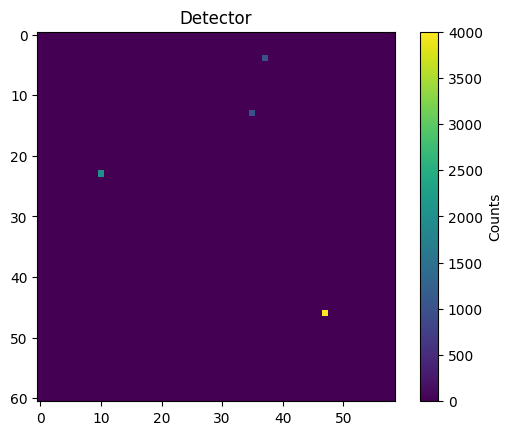

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
c0 = ax.imshow(skymap_before_mask)
fig.colorbar(c0, ax=ax, label="Counts")
ax.set_title("Detector")
plt.show()

In [121]:
detector = simulate.transport(photon_list, mask)

In [122]:
from masks import reconstruct

skymap_iros, sources = reconstruct.iros(detector, mask, decoder, threshold=5.0)

f = masks.open_fraction(mask)
skymap_iros /= f

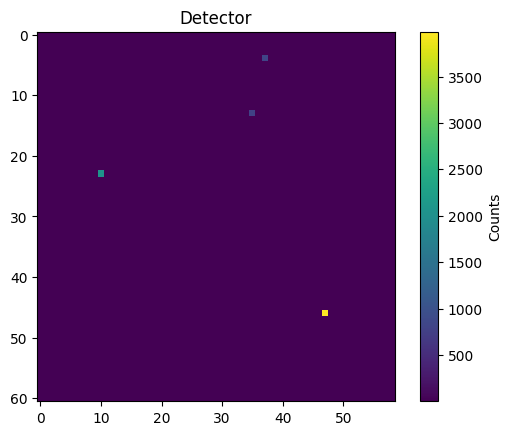

In [123]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
c0 = ax.imshow(skymap_iros)
fig.colorbar(c0, ax=ax, label="Counts")
ax.set_title("Detector")
plt.show()

In [124]:
skymap_cc = reconstruct.cross_correlation(detector, decoder)  / f
skymap_mlemrec = reconstruct.mlem(detector, mask)  / f
skymap_mem, _ = reconstruct.mem(detector, mask, decoder)
skymap_mem /= f

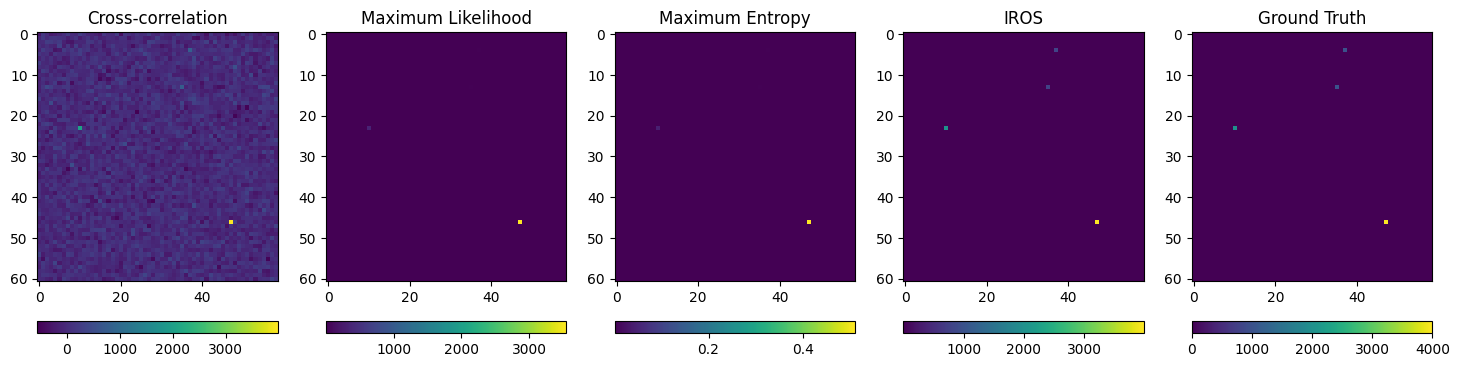

In [125]:
from masks.plot import plotmaps

fig, axs = plotmaps(
    [
        (skymap_cc, "Cross-correlation"),
        (skymap_mlemrec, "Maximum Likelihood"),
        (skymap_mem, "Maximum Entropy"),
        (skymap_iros, "IROS"),
        (skymap_before_mask, "Ground Truth"),
    ],
    ncols=5,
    figsize=(18, 7),
)
plt.show()